In [779]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
import matplotlib.font_manager as fm
%matplotlib inline

In [780]:
# colums 인덱스 정의
data_columns = ['스케쥴 id','터미널 코드','Call Year','선박 코드','Call No','접안 일시','출발 일시','선적 작업 수량','양하 작업 수량','Shft 작업 수량','정보 수집 일시']

In [781]:
# CSV파일 불러오기
terminal_schedule_2017=pd.DataFrame(pd.read_csv('terminal_schedule_2017.csv',header=None,encoding='utf-8'))
terminal_schedule_2018=pd.DataFrame(pd.read_csv('terminal_schedule_2018.csv',header=None,encoding='utf-8'))
terminal_schedule_2019=pd.DataFrame(pd.read_csv('terminal_schedule_2019.csv',header=None,encoding='utf-8'))
terminal_schedule_2020=pd.DataFrame(pd.read_csv('terminal_schedule_2020.csv',header=None,encoding='utf-8'))
terminal_schedule_2017.columns=data_columns
terminal_schedule_2018.columns=data_columns
terminal_schedule_2019.columns=data_columns
terminal_schedule_2020.columns=data_columns

C:\Users\kjw50\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\kjw50\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [782]:
# 2017~2020년 데이터 합치기
terminal_schedule = pd.concat([terminal_schedule_2017,terminal_schedule_2018,terminal_schedule_2019,terminal_schedule_2020])
terminal_schedule = terminal_schedule.reset_index()
terminal_schedule.drop('index',axis=1,inplace=True)
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No         접안 일시         출발 일시  \
0              1   BNCT       2017  CMPG     004  2.017071e+13  2.017071e+13   
1              2   BNCT       2017  CARC     003  2.017071e+13  2.017071e+13   
2              3   BNCT       2017  IABM     019  2.017071e+13  2.017071e+13   
3              4   BNCT       2017  TXTR     015  2.017071e+13  2.017071e+13   
4              5   BNCT       2017  CXFZ     002  2.017071e+13  2.017071e+13   
...          ...    ...        ...   ...     ...           ...           ...   
1047759  1663231   BPTC       2020  NSTA      30  2.020112e+13  2.020112e+13   
1047760  1663232   BPTC       2020  JPPC      47  2.020112e+13  2.020112e+13   
1047761  1663233   BPTC       2020  NSSK      31  2.020112e+13  2.020112e+13   
1047762  1663234   BPTC       2020  NSSO       6  2.020121e+13  2.020121e+13   
1047763  1663235   BPTC       2020  NSSU      16  2.020121e+13  2.020121e+13   

         선적 작업 수량  양하 작업 수량  Shft 작업 수량

In [783]:
# str과 float로 된 날짜 형식을 datetime으로 바꾸기

# float 형식을 str 형식으로 변환
terminal_schedule[['접안 일시','출발 일시']] = terminal_schedule[['접안 일시','출발 일시']].astype(str)
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str.slice(start=0,stop=14)
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str.slice(start=0,stop=14)

# str 형식을 datetime 형식으로 바꾸기 위한 전처리
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str[0:4]+'-'+terminal_schedule['접안 일시'].str[4:6]+'-'+terminal_schedule['접안 일시'].str[6:8] +' '+terminal_schedule['접안 일시'].str[8:10]+':'+terminal_schedule['접안 일시'].str[10:12]+':'+terminal_schedule['접안 일시'].str[12:14]
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str[0:4]+'-'+terminal_schedule['출발 일시'].str[4:6]+'-'+terminal_schedule['출발 일시'].str[6:8] +' '+terminal_schedule['출발 일시'].str[8:10]+':'+terminal_schedule['출발 일시'].str[10:12]+':'+terminal_schedule['출발 일시'].str[12:14]

# 날짜 형식이 안맞는 값 제거
terminal_schedule = terminal_schedule[terminal_schedule['접안 일시'].str.len() == 19]
terminal_schedule = terminal_schedule[terminal_schedule['출발 일시'].str.len() == 19]

# str 형식을 datetime으로 변환
terminal_schedule['접안 일시']=pd.to_datetime(terminal_schedule['접안 일시'])
terminal_schedule['출발 일시']=pd.to_datetime(terminal_schedule['출발 일시'])
terminal_schedule['정보 수집 일시']=pd.to_datetime(terminal_schedule['정보 수집 일시'])
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0              1   BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1              2   BNCT       2017  CARC     003 2017-07-10 02:42:00   
2              3   BNCT       2017  IABM     019 2017-07-10 13:50:00   
3              4   BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4              5   BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량  Shft 작업 수량  \
0       2017-07-10 00:25:00     872.0     958.0        40.0   
1       2

In [846]:
#1_1 어떤 선박의 예상 입항 일시가 주어졌을 때 해당 선박의 실제 입항 일시

# 부산지역 외 다른 항구들은 제외
terminal_schedule_1_1 = terminal_schedule
terminal_schedule[['Call Year']] = terminal_schedule[['Call Year']].astype(str)
terminal_schedule_1_1 = terminal_schedule_1_1.drop(terminal_schedule_1_1[(terminal_schedule_1_1['터미널 코드'] =='GWCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='SMGT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='KITL')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='ICT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='E1CT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='HJIT')|                                                                         (terminal_schedule_1_1['터미널 코드'] =='SNCT')&
                                                                         (terminal_schedule_1_1['터미널 코드'] =='IGCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='JUCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='PTCT')].index)
terminal_schedule_1_1

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
0,1,BNCT,2017,CMPG,004,2017-07-09 08:48:00,2017-07-10 00:25:00,872.0,958.0,NaT
1,2,BNCT,2017,CARC,003,2017-07-10 02:42:00,2017-07-10 17:50:00,947.0,285.0,NaT
2,3,BNCT,2017,IABM,019,2017-07-10 13:50:00,2017-07-10 21:50:00,23.0,191.0,NaT
3,4,BNCT,2017,TXTR,015,2017-07-10 16:10:00,2017-07-11 11:05:00,247.0,196.0,NaT
4,5,BNCT,2017,CXFZ,002,2017-07-11 06:30:00,2017-07-11 20:00:00,732.0,0.0,NaT
...,...,...,...,...,...,...,...,...,...,...
1047759,1663231,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,1663232,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22
1047761,1663233,BPTC,2020,NSSK,31,2020-11-23 14:00:00,2020-11-24 04:00:00,250.0,250.0,2020-11-19 01:05:22
1047762,1663234,BPTC,2020,NSSO,6,2020-12-07 06:00:00,2020-12-08 05:00:00,0.0,0.0,2020-11-19 01:05:22


In [847]:
# Shft 작업 수량 행 삭제
terminal_schedule_1_1 = terminal_schedule
terminal_schedule_1_1.drop('Shft 작업 수량',axis=1,inplace=True)
print(terminal_schedule_1_1)

KeyError: "['Shft 작업 수량'] not found in axis"

In [849]:
# 결측치 확인
print(terminal_schedule_1_1.isnull().sum())

스케쥴 id            0
터미널 코드            0
Call Year         0
선박 코드             0
Call No           0
접안 일시             0
출발 일시             0
선적 작업 수량      20435
양하 작업 수량      20435
정보 수집 일시     499561
dtype: int64


In [850]:
# 결측치 제거
terminal_schedule_1_1 = terminal_schedule_1_1.dropna()
print(terminal_schedule_1_1.isnull().sum())
print(terminal_schedule_1_1.head(20))

스케쥴 id       0
터미널 코드       0
Call Year    0
선박 코드        0
Call No      0
접안 일시        0
출발 일시        0
선적 작업 수량     0
양하 작업 수량     0
정보 수집 일시     0
dtype: int64
        스케쥴 id 터미널 코드 Call Year 선박 코드 Call No               접안 일시  \
447374  980651    PNC      2018  PROT     001 2019-08-07 11:00:00   
512113  822884   BNCT      2019  CABC     001 2019-03-27 07:00:00   
512114  822885   BNCT      2019  CMEI     001 2019-03-28 01:00:00   
512115  822886   BNCT      2019  AWI4     005 2019-03-28 14:00:00   
512116  822887   BNCT      2019  AKN4     005 2019-04-01 14:00:00   
512117  822888   BNCT      2019  CFOS     014 2019-04-02 12:00:00   
512118  822889   BPTC      2019  KSAC      11 2019-03-26 20:00:00   
512119  822890   DPCT      2019  OCNK      03 2019-03-27 02:00:00   
512120  822891   GWCT      2019  MCAN    0001 2019-03-28 20:03:00   
512121  822892    ICT      2019  KHHT    0003 2019-03-26 23:00:00   
512122  822893    ICT      2019  STZJ    0006 2019-03-27 12:00:00   
512123  8

In [851]:
# 정보 수집 일시가 접안 예상 일시보다 3일 이상 이전인 것만 필터링
terminal_schedule_1_1.drop(terminal_schedule_1_1[(terminal_schedule_1_1['접안 일시']-terminal_schedule_1_1['정보 수집 일시']).dt.days <= 3].index, inplace=True)
terminal_schedule_1_1.head(20)

C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
447374,980651,PNC,2018,PROT,001,2019-08-07 11:00:00,2019-08-07 22:00:00,0.0,0.0,2019-07-28 00:18:59
512116,822887,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-04-02 08:00:00,100.0,1000.0,2019-03-26 03:47:19
512117,822888,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-04-03 04:00:00,100.0,1500.0,2019-03-26 03:47:20
512134,822905,HPNT,2019,HSPN,004,2019-04-03 15:00:00,2019-04-04 05:00:00,400.0,600.0,2019-03-26 04:23:44
512142,822913,PNC,2019,CISX,002,2019-03-31 07:00:00,2019-04-01 07:00:00,0.0,0.0,2019-03-26 04:25:41
512147,822919,BNCT,2019,AWI4,005,2019-03-30 06:00:00,2019-03-30 23:00:00,1000.0,400.0,2019-03-26 04:47:44
512150,822922,BIT,2019,SKTK,11,2019-04-05 01:00:00,2019-04-05 12:00:00,0.0,0.0,2019-03-26 04:49:24
512151,822923,BIT,2019,HTVY,14,2019-04-05 06:00:00,2019-04-05 16:00:00,0.0,0.0,2019-03-26 04:49:25
512164,822936,HKTL,2019,KSCV,06,2019-03-30 07:00:00,2019-03-30 17:00:00,250.0,250.0,2019-03-26 04:51:54
512165,822937,HKTL,2019,KSCM,11,2019-03-30 14:00:00,2019-03-31 03:00:00,220.0,230.0,2019-03-26 04:51:55


In [852]:
# 정보 수집 일자가 봄(3,4,5월)인 데이터만 표출
terminal_schedule_1_1_spr = terminal_schedule_1_1.drop(terminal_schedule_1_1.loc[(terminal_schedule_1_1['정보 수집 일시'].dt.month > 5) | (terminal_schedule_1_1['정보 수집 일시'].dt.month < 3)].index)
terminal_schedule_1_1_spr.head(20)

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512116,822887,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-04-02 08:00:00,100.0,1000.0,2019-03-26 03:47:19
512117,822888,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-04-03 04:00:00,100.0,1500.0,2019-03-26 03:47:20
512134,822905,HPNT,2019,HSPN,004,2019-04-03 15:00:00,2019-04-04 05:00:00,400.0,600.0,2019-03-26 04:23:44
512142,822913,PNC,2019,CISX,002,2019-03-31 07:00:00,2019-04-01 07:00:00,0.0,0.0,2019-03-26 04:25:41
512147,822919,BNCT,2019,AWI4,005,2019-03-30 06:00:00,2019-03-30 23:00:00,1000.0,400.0,2019-03-26 04:47:44
512150,822922,BIT,2019,SKTK,11,2019-04-05 01:00:00,2019-04-05 12:00:00,0.0,0.0,2019-03-26 04:49:24
512151,822923,BIT,2019,HTVY,14,2019-04-05 06:00:00,2019-04-05 16:00:00,0.0,0.0,2019-03-26 04:49:25
512164,822936,HKTL,2019,KSCV,06,2019-03-30 07:00:00,2019-03-30 17:00:00,250.0,250.0,2019-03-26 04:51:54
512165,822937,HKTL,2019,KSCM,11,2019-03-30 14:00:00,2019-03-31 03:00:00,220.0,230.0,2019-03-26 04:51:55
512166,822938,HKTL,2019,KCNM,13,2019-03-31 19:00:00,2019-04-01 08:00:00,200.0,200.0,2019-03-26 04:51:59


In [853]:
# 정답 dataframe을 정하고 기존의 데이터프레임에 정답행 삽입
terminal_schedule_1_1_spr['항해 index'] = terminal_schedule_1_1_spr['터미널 코드'] + terminal_schedule_1_1_spr['Call Year'] + terminal_schedule_1_1_spr['선박 코드'] + terminal_schedule_1_1_spr['Call No']
terminal_schedule_1_1_spr_las = terminal_schedule_1_1_spr.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep="last")
terminal_schedule_1_1_spr_las = terminal_schedule_1_1_spr_las[['터미널 코드','Call Year','선박 코드','Call No','접안 일시']]
terminal_schedule_1_1_spr_las['항해 index'] = terminal_schedule_1_1_spr_las['터미널 코드'] + terminal_schedule_1_1_spr_las['Call Year'] + terminal_schedule_1_1_spr_las['선박 코드'] + terminal_schedule_1_1_spr_las['Call No']
terminal_schedule_1_1_spr_las = terminal_schedule_1_1_spr_las.rename(columns={'접안 일시':'실제 접안 일시'})
terminal_schedule_1_1_spr_las = terminal_schedule_1_1_spr_las[['실제 접안 일시','항해 index']]
# print(terminal_schedule_1_1_spr_las.head(10))
terminal_schedule_1_1_spr = pd.merge(terminal_schedule_1_1_spr,terminal_schedule_1_1_spr_las,on='항해 index',how="left")[['터미널 코드','Call Year','선박 코드','Call No','접안 일시','정보 수집 일시','실제 접안 일시']]
terminal_schedule_1_1_spr.head(10)

,터미널 코드,Call Year,선박 코드,Call No,접안 일시,정보 수집 일시,실제 접안 일시
0,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-03-26 03:47:19,2019-04-01 14:00:00
1,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-03-26 03:47:20,2019-04-03 02:00:00
2,HPNT,2019,HSPN,004,2019-04-03 15:00:00,2019-03-26 04:23:44,2019-04-03 15:00:00
3,PNC,2019,CISX,002,2019-03-31 07:00:00,2019-03-26 04:25:41,2019-04-02 05:00:00
4,BNCT,2019,AWI4,005,2019-03-30 06:00:00,2019-03-26 04:47:44,2019-03-30 06:00:00
5,BIT,2019,SKTK,11,2019-04-05 01:00:00,2019-03-26 04:49:24,2019-04-05 15:00:00
6,BIT,2019,HTVY,14,2019-04-05 06:00:00,2019-03-26 04:49:25,2019-04-05 06:00:00
7,HKTL,2019,KSCV,06,2019-03-30 07:00:00,2019-03-26 04:51:54,2019-03-30 07:00:00
8,HKTL,2019,KSCM,11,2019-03-30 14:00:00,2019-03-26 04:51:55,2019-03-30 14:00:00
9,HKTL,2019,KCNM,13,2019-03-31 19:00:00,2019-03-26 04:51:59,2019-03-31 19:00:00


In [861]:
# dataframe에 필요한 항 추가
terminal_schedule_1_1_spr['접안 일시 - 정보 수집 일시'] = terminal_schedule_1_1_spr['접안 일시'] - terminal_schedule_1_1_spr['정보 수집 일시']
terminal_schedule_1_1_spr['접안 일시 오차'] = terminal_schedule_1_1_spr['실제 접안 일시'] - terminal_schedule_1_1_spr['접안 일시']
terminal_schedule_1_1_spr['접안 일시 - 정보 수집 일시(초)'] = terminal_schedule_1_1_spr['접안 일시 - 정보 수집 일시'].dt.seconds + terminal_schedule_1_1_spr['접안 일시 - 정보 수집 일시'].dt.days*86400
terminal_schedule_1_1_spr['접안 일시 오차(초)'] = terminal_schedule_1_1_spr['접안 일시 오차'].dt.seconds + terminal_schedule_1_1_spr['접안 일시 오차'].dt.days*86400
terminal_schedule_1_1_spr.head(10)

,터미널 코드,Call Year,선박 코드,Call No,접안 일시,정보 수집 일시,실제 접안 일시,접안 일시 - 정보 수집 일시,접안 일시 오차,접안 일시 - 정보 수집 일시(초),접안 일시 오차(초)
0,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-03-26 03:47:19,2019-04-01 14:00:00,6 days 10:12:41,0 days 00:00:00,555161,0
1,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-03-26 03:47:20,2019-04-03 02:00:00,7 days 08:12:40,0 days 14:00:00,634360,50400
2,HPNT,2019,HSPN,004,2019-04-03 15:00:00,2019-03-26 04:23:44,2019-04-03 15:00:00,8 days 10:36:16,0 days 00:00:00,729376,0
3,PNC,2019,CISX,002,2019-03-31 07:00:00,2019-03-26 04:25:41,2019-04-02 05:00:00,5 days 02:34:19,1 days 22:00:00,441259,165600
4,BNCT,2019,AWI4,005,2019-03-30 06:00:00,2019-03-26 04:47:44,2019-03-30 06:00:00,4 days 01:12:16,0 days 00:00:00,349936,0
5,BIT,2019,SKTK,11,2019-04-05 01:00:00,2019-03-26 04:49:24,2019-04-05 15:00:00,9 days 20:10:36,0 days 14:00:00,850236,50400
6,BIT,2019,HTVY,14,2019-04-05 06:00:00,2019-03-26 04:49:25,2019-04-05 06:00:00,10 days 01:10:35,0 days 00:00:00,868235,0
7,HKTL,2019,KSCV,06,2019-03-30 07:00:00,2019-03-26 04:51:54,2019-03-30 07:00:00,4 days 02:08:06,0 days 00:00:00,353286,0
8,HKTL,2019,KSCM,11,2019-03-30 14:00:00,2019-03-26 04:51:55,2019-03-30 14:00:00,4 days 09:08:05,0 days 00:00:00,378485,0
9,HKTL,2019,KCNM,13,2019-03-31 19:00:00,2019-03-26 04:51:59,2019-03-31 19:00:00,5 days 14:08:01,0 days 00:00:00,482881,0


In [ ]:
# 여기서부터 input 접안 일시 - 정보 수집 일시(초), output '접안 일시 오차(초)' 모델생성

In [655]:
# 1_2 해당 선박의 작업 시간은 얼마나 걸릴지 예상하시오

# 선적 작업 수량과 양하 작업 수량을 바탕으로 추측
# 마지막 정보 수집 일시를 정답이라 가정 

# Shft 작업 수량 행 삭제
terminal_schedule_1_2 = terminal_schedule
terminal_schedule_1_2.drop('Shft 작업 수량',axis=1,inplace=True)
print(terminal_schedule_1_2)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0              1   BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1              2   BNCT       2017  CARC     003 2017-07-10 02:42:00   
2              3   BNCT       2017  IABM     019 2017-07-10 13:50:00   
3              4   BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4              5   BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시  
0       2017-07-10 00:25:00     872.0     958.0                 N

In [656]:
# 결측치 확인
print(terminal_schedule_1_2.isnull().sum())

스케쥴 id            0
터미널 코드            0
Call Year         0
선박 코드             0
Call No           0
접안 일시             0
출발 일시             0
선적 작업 수량      20435
양하 작업 수량      20435
정보 수집 일시     499561
dtype: int64


In [657]:
# 결측치 제거
terminal_schedule_1_2 = terminal_schedule_1_2.dropna()
print(terminal_schedule_1_2.isnull().sum())
print(terminal_schedule_1_2)

스케쥴 id       0
터미널 코드       0
Call Year    0
선박 코드        0
Call No      0
접안 일시        0
출발 일시        0
선적 작업 수량     0
양하 작업 수량     0
정보 수집 일시     0
dtype: int64
          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
447374    980651    PNC       2018  PROT     001 2019-08-07 11:00:00   
512113    822884   BNCT       2019  CABC     001 2019-03-27 07:00:00   
512114    822885   BNCT       2019  CMEI     001 2019-03-28 01:00:00   
512115    822886   BNCT       2019  AWI4     005 2019-03-28 14:00:00   
512116    822887   BNCT       2019  AKN4     005 2019-04-01 14:00:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU     

In [658]:
# 작업 수량이 0이나 -인 행 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['선적 작업 수량']<=0].index, inplace=True)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['양하 작업 수량']<=0].index, inplace=True)

# 출발 일시가 접안 일시보다 빠른경우 제거 (데이터 오류)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['출발 일시'] <= terminal_schedule_1_2['접안 일시']].index, inplace=True)

terminal_schedule_1_2

C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512113,822884,BNCT,2019,CABC,001,2019-03-27 07:00:00,2019-03-27 23:00:00,1125.0,150.0,2019-03-26 03:47:05
512115,822886,BNCT,2019,AWI4,005,2019-03-28 14:00:00,2019-03-29 07:00:00,1000.0,100.0,2019-03-26 03:47:08
512116,822887,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-04-02 08:00:00,100.0,1000.0,2019-03-26 03:47:19
512117,822888,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-04-03 04:00:00,100.0,1500.0,2019-03-26 03:47:20
512118,822889,BPTC,2019,KSAC,11,2019-03-26 20:00:00,2019-03-27 08:00:00,300.0,306.0,2019-03-26 03:47:09
...,...,...,...,...,...,...,...,...,...,...
1047755,1663227,BPTC,2020,TLAK,2,2020-11-20 14:00:00,2020-11-21 00:00:00,260.0,60.0,2020-11-19 01:05:22
1047757,1663229,BPTC,2020,HHFW,22,2020-11-20 16:00:00,2020-11-21 10:00:00,650.0,422.0,2020-11-19 01:05:22
1047759,1663231,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,1663232,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22


In [659]:
# 중복 항해 제거 및 최종값(정답) 표출
terminal_schedule_1_2.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep="last")

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512128,822899,BPTC,2019,KELB,13,2019-03-25 21:40:00,2019-03-26 14:00:00,185.0,248.0,2019-03-26 04:17:11
512132,822903,HPNT,2019,AGHO,003,2019-03-25 21:00:00,2019-03-26 18:00:00,1005.0,428.0,2019-03-26 04:21:50
512152,822924,BPTC,2019,HPUS,35,2019-03-26 08:50:00,2019-03-26 14:00:00,37.0,81.0,2019-03-26 04:48:32
512158,822930,IGCT,2019,DPPA,012,2019-03-26 06:36:00,2019-03-26 09:09:00,40.0,35.0,2019-03-26 04:51:54
512189,822963,HKTL,2019,CKSF,10,2019-03-26 02:00:00,2019-03-26 16:00:00,329.0,333.0,2019-03-26 05:23:38
...,...,...,...,...,...,...,...,...,...,...
1047755,1663227,BPTC,2020,TLAK,2,2020-11-20 14:00:00,2020-11-21 00:00:00,260.0,60.0,2020-11-19 01:05:22
1047757,1663229,BPTC,2020,HHFW,22,2020-11-20 16:00:00,2020-11-21 10:00:00,650.0,422.0,2020-11-19 01:05:22
1047759,1663231,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,1663232,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22


In [660]:
# 출발 시간의 참값을 알아내기 위해 우선 정보 수집 일시가 출발 일시 이전일 시 데이터 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2[terminal_schedule_1_2['출발 일시'] >= terminal_schedule_1_2['정보 수집 일시']].index, inplace=True)
terminal_schedule_1_2

C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22
...,...,...,...,...,...,...,...,...,...,...
1045323,1660730,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,984.0,1581.0,2020-11-17 00:45:38
1045612,1661031,BNMT,2020,DJFD,32,2020-11-16 17:00:00,2020-11-16 22:00:00,34.0,48.0,2020-11-17 03:05:21
1045693,1661124,HKTL,2020,KSIS,42,2020-11-16 13:00:00,2020-11-17 04:00:00,101.0,352.0,2020-11-17 05:05:21
1045907,1661338,DPCT,2020,CBUX,10,2020-11-16 14:00:00,2020-11-17 08:00:00,481.0,480.0,2020-11-17 08:05:21


In [661]:
# 걸린시간 열 추가
terminal_schedule_1_2['작업 소요 시간'] = terminal_schedule_1_2['출발 일시'] - terminal_schedule_1_2['접안 일시']
terminal_schedule_1_2['작업 소요 시간(초)'] = terminal_schedule_1_2['작업 소요 시간'].dt.seconds + terminal_schedule_1_2['작업 소요 시간'].dt.days*86400
terminal_schedule_1_2['총 작업량'] = terminal_schedule_1_2['선적 작업 수량'] + terminal_schedule_1_2['양하 작업 수량']
terminal_schedule_1_2['작업량 대비 소요 시간'] = terminal_schedule_1_2['작업 소요 시간(초)'] / terminal_schedule_1_2['양하 작업 수량']
terminal_schedule_1_2

# 맨 밑에 이상한놈이 보이네요 헐

C:\Users\kjw50\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjw50\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kjw50\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,작업 소요 시간,작업 소요 시간(초),총 작업량,작업량 대비 소요 시간
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21,0 days 15:48:00,56880,705.0,164.393064
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07,0 days 09:09:00,32940,309.0,181.988950
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48,0 days 19:45:00,71100,1677.0,65.289256
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13,0 days 19:45:00,71100,1673.0,65.409384
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22,0 days 12:00:00,43200,930.0,81.663516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045323,1660730,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,984.0,1581.0,2020-11-17 00:45:38,1 days 03:00:00,97200,2565.0,61.480076
1045612,1661031,BNMT,2020,DJFD,32,2020-11-16 17:00:00,2020-11-16 22:00:00,34.0,48.0,2020-11-17 03:05:21,0 days 05:00:00,18000,82.0,375.000000
1045693,1661124,HKTL,2020,KSIS,42,2020-11-16 13:00:00,2020-11-17 04:00:00,101.0,352.0,2020-11-17 05:05:21,0 days 15:00:00,54000,453.0,153.409091
1045907,1661338,DPCT,2020,CBUX,10,2020-11-16 14:00:00,2020-11-17 08:00:00,481.0,480.0,2020-11-17 08:05:21,0 days 18:00:00,64800,961.0,135.000000


In [662]:
from sklearn import linear_model
import numpy as np
import matplotlib
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
matplotlib.style.use('ggplot')

In [663]:
# statsmodels module이 안깔려있으면 설치!
!pip install statsmodels

512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1045323    2565.0
1045612      82.0
1045693     453.0
1045907     961.0
1046324     291.0
Length: 2032, dtype: float64
512594      56880
512827      32940
513175      71100
513200      71100
513228      43200
            ...  
1045323     97200
1045612     18000
1045693     54000
1045907     64800
1046324    316800
Name: 작업 소요 시간, Length: 2032, dtype: int64


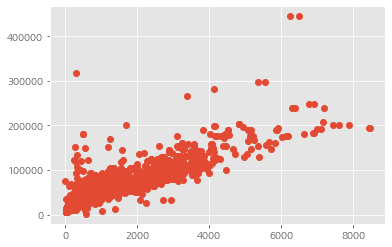

In [664]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [665]:
# 작업량 대비 작업 소요 시간에서 IQR을 측정해 이상치 제거

quartile_1 = terminal_schedule_1_2['작업량 대비 소요 시간'].quantile(0.25)
quartile_3 = terminal_schedule_1_2['작업량 대비 소요 시간'].quantile(0.75)
IQR = quartile_3 - quartile_1
filter_df = terminal_schedule_1_2[(terminal_schedule_1_2['작업량 대비 소요 시간'] < (quartile_1 - 1.5 * IQR)) | (terminal_schedule_1_2['작업량 대비 소요 시간'] > (quartile_3 + 1.5 * IQR))]
terminal_schedule_1_2 = terminal_schedule_1_2.drop(filter_df.index)
print(terminal_schedule_1_2)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
512594    823853   HPNT       2019  HCSO     010 2019-03-26 05:12:00   
512827    824096   IGCT       2019  COTW     012 2019-03-26 14:18:00   
513175    824698    PNC       2019  EMTL     002 2019-03-26 00:00:00   
513200    824724    PNC       2019  EMTL     002 2019-03-26 00:00:00   
513228    824754   HJIT       2019  KSCL     013 2019-03-26 07:30:00   
...          ...    ...        ...   ...     ...                 ...   
1045291  1660694    PNC       2020  HAIX       4 2020-11-15 07:00:00   
1045323  1660730    PNC       2020  HAIX       4 2020-11-15 07:00:00   
1045612  1661031   BNMT       2020  DJFD      32 2020-11-16 17:00:00   
1045693  1661124   HKTL       2020  KSIS      42 2020-11-16 13:00:00   
1045907  1661338   DPCT       2020  CBUX      10 2020-11-16 14:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시  \
512594  2019-03-26 21:00:00     359.0     346.0 2019-03-26 22:48

512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1045291    2571.0
1045323    2565.0
1045612      82.0
1045693     453.0
1045907     961.0
Length: 1818, dtype: float64
512594     56880
512827     32940
513175     71100
513200     71100
513228     43200
           ...  
1045291    97200
1045323    97200
1045612    18000
1045693    54000
1045907    64800
Name: 작업 소요 시간, Length: 1818, dtype: int64


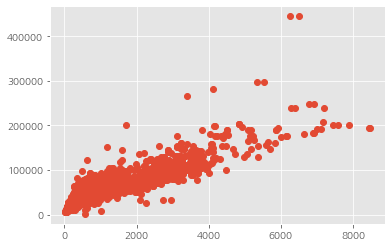

In [666]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [667]:
# 추가적으로 데이터 선별

terminal_schedule_1_2.drop(terminal_schedule_1_2[terminal_schedule_1_2['작업 소요 시간(초)'] >= (terminal_schedule_1_2['총 작업량']*35 + 100000)].index, inplace=True)
terminal_schedule_1_2

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,작업 소요 시간,작업 소요 시간(초),총 작업량,작업량 대비 소요 시간
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21,0 days 15:48:00,56880,705.0,164.393064
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07,0 days 09:09:00,32940,309.0,181.988950
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48,0 days 19:45:00,71100,1677.0,65.289256
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13,0 days 19:45:00,71100,1673.0,65.409384
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22,0 days 12:00:00,43200,930.0,81.663516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045291,1660694,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,987.0,1584.0,2020-11-17 00:25:21,1 days 03:00:00,97200,2571.0,61.363636
1045323,1660730,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,984.0,1581.0,2020-11-17 00:45:38,1 days 03:00:00,97200,2565.0,61.480076
1045612,1661031,BNMT,2020,DJFD,32,2020-11-16 17:00:00,2020-11-16 22:00:00,34.0,48.0,2020-11-17 03:05:21,0 days 05:00:00,18000,82.0,375.000000
1045693,1661124,HKTL,2020,KSIS,42,2020-11-16 13:00:00,2020-11-17 04:00:00,101.0,352.0,2020-11-17 05:05:21,0 days 15:00:00,54000,453.0,153.409091


512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1045291    2571.0
1045323    2565.0
1045612      82.0
1045693     453.0
1045907     961.0
Length: 1809, dtype: float64
512594     56880
512827     32940
513175     71100
513200     71100
513228     43200
           ...  
1045291    97200
1045323    97200
1045612    18000
1045693    54000
1045907    64800
Name: 작업 소요 시간, Length: 1809, dtype: int64


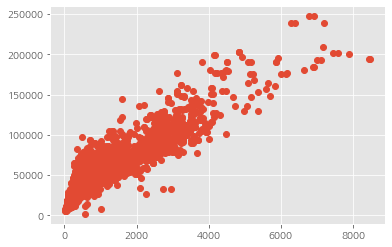

In [668]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [669]:
# 파라미터간 상관관계 분석 및 시각화
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간(초)']]
corr = data.corr()
corr

,선적 작업 수량,양하 작업 수량,작업 소요 시간(초)
선적 작업 수량,1.000000,0.582338,0.818335
양하 작업 수량,0.582338,1.000000,0.803367
작업 소요 시간(초),0.818335,0.803367,1.000000


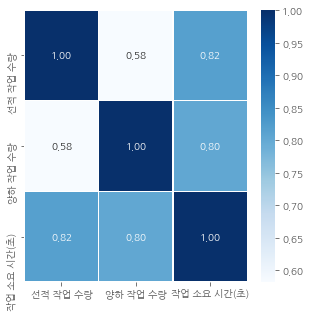

In [670]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=data.corr(), annot=True,fmt='.2f', linewidths=.5, cmap='Blues')
plt.rcParams['font.family'] = 'NanumGothic'
# 둘다 비슷하게 상관있다!

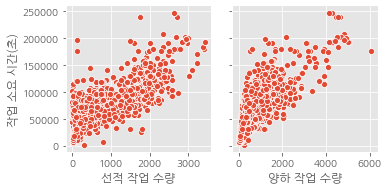

In [671]:
# 분포도 분석
sns.pairplot(data, x_vars=['선적 작업 수량','양하 작업 수량'],y_vars=['작업 소요 시간(초)'])

In [673]:
# 다중선형회귀 분석

data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간(초)']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간(초)']
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y= y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  25285.47063736601
b value =  [29.67213843 24.94944994]


In [674]:
residuals = y-prediction
residuals.describe()

count    1.809000e+03
mean     4.651545e-12
std      1.622662e+04
min     -7.500002e+04
25%     -1.067115e+04
50%     -2.214230e+03
75%      9.716877e+03
max      7.703027e+04
Name: 작업 소요 시간(초), dtype: float64

In [675]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8312920758408638


In [676]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.8312920758408638
Mean_Squared_Error =  263157665.25027066
RMSE =  16222.135039823539


In [677]:
# statsmodels를 활용한 다중선형회귀분석 정확도 79%
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               작업 소요 시간   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     4449.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:10:53   Log-Likelihood:                -20104.
No. Observations:                1809   AIC:                         4.021e+04
Df Residuals:                    1806   BIC:                         4.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.529e+04    550.331     45.946      0.0

In [678]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1628, 2)
X_test shape: (181, 2)
y_train shape: (1628,)
y_test shape: (181,)


0.8132108051750566


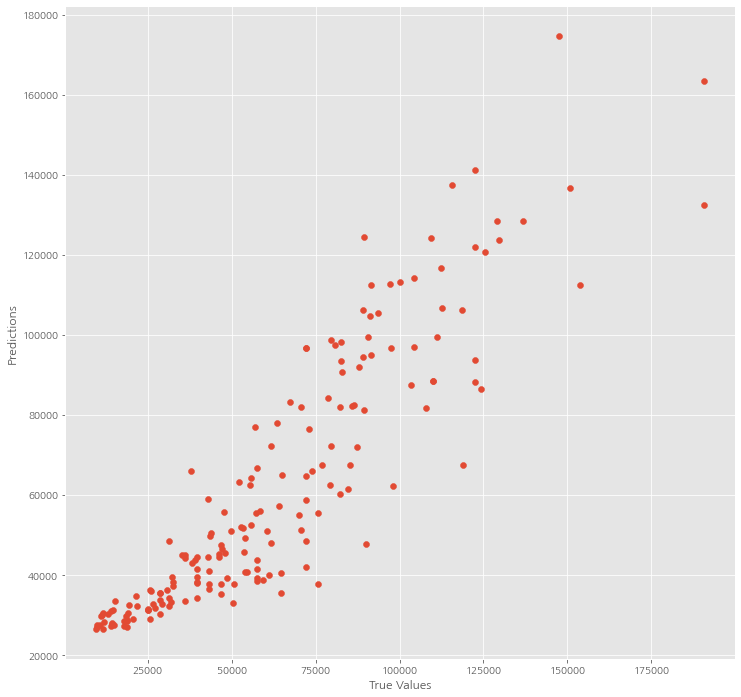

In [679]:
# Linear Regression 분석
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print(model.score(X_test, y_test))

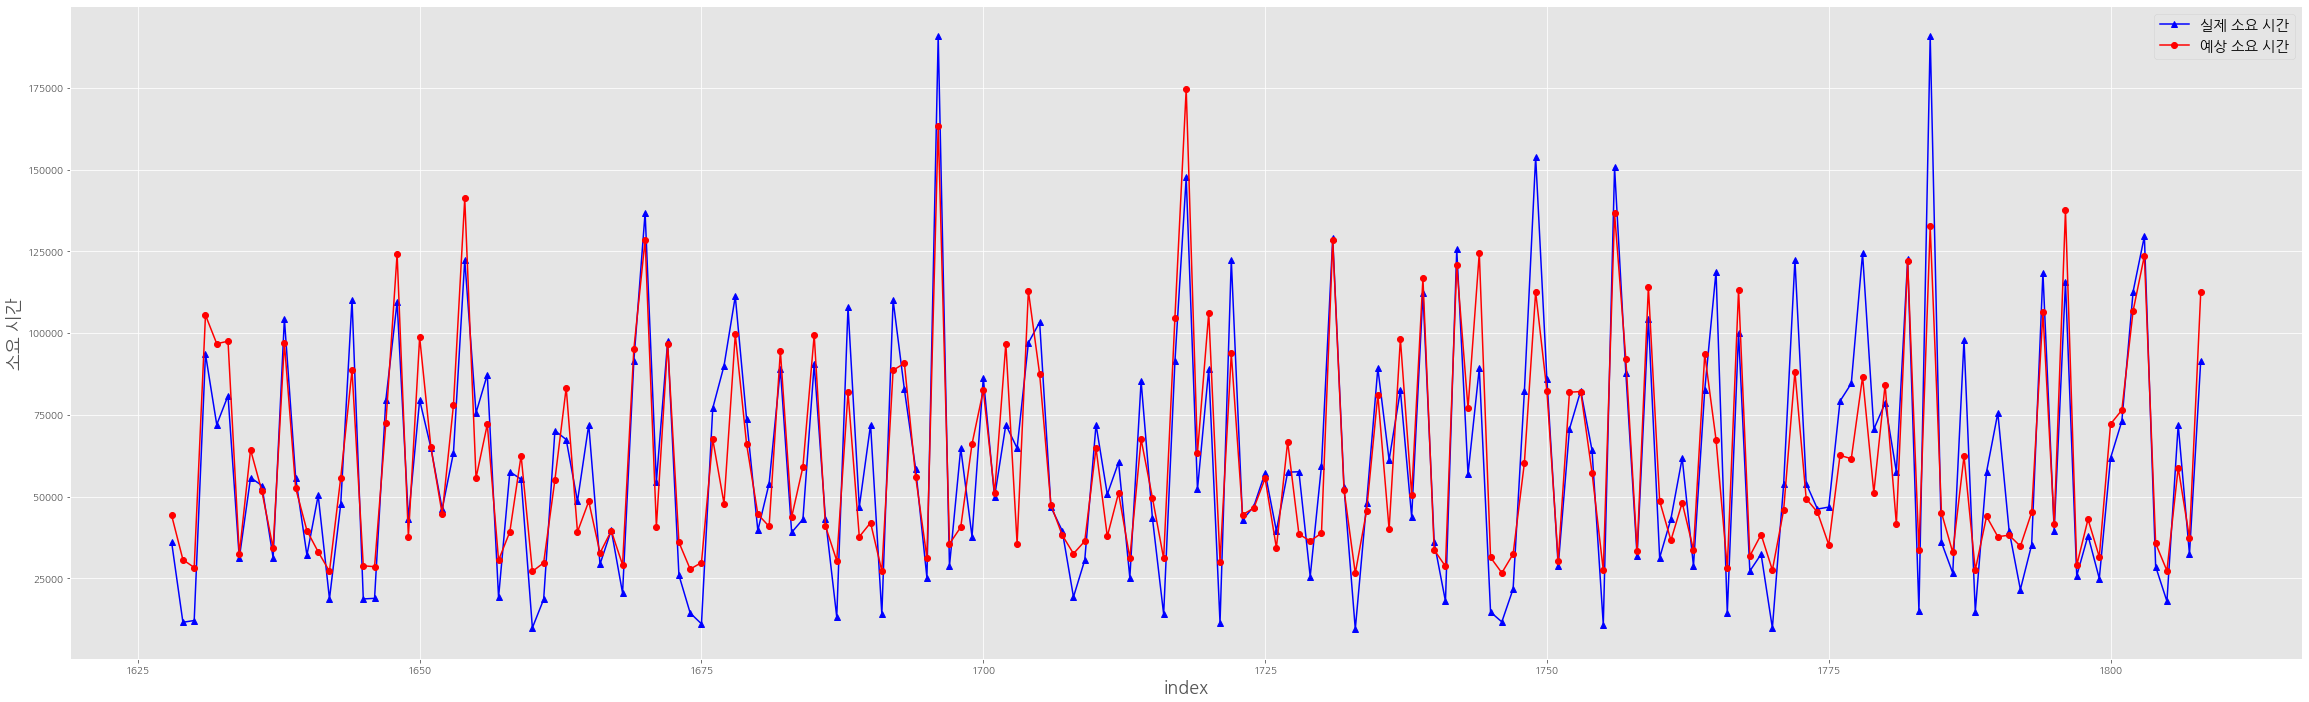

In [680]:
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='x-large')
plt.show()

In [685]:
# Ridge_Lasso 회귀

# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.832981
테스트 세트 점수: 0.813211


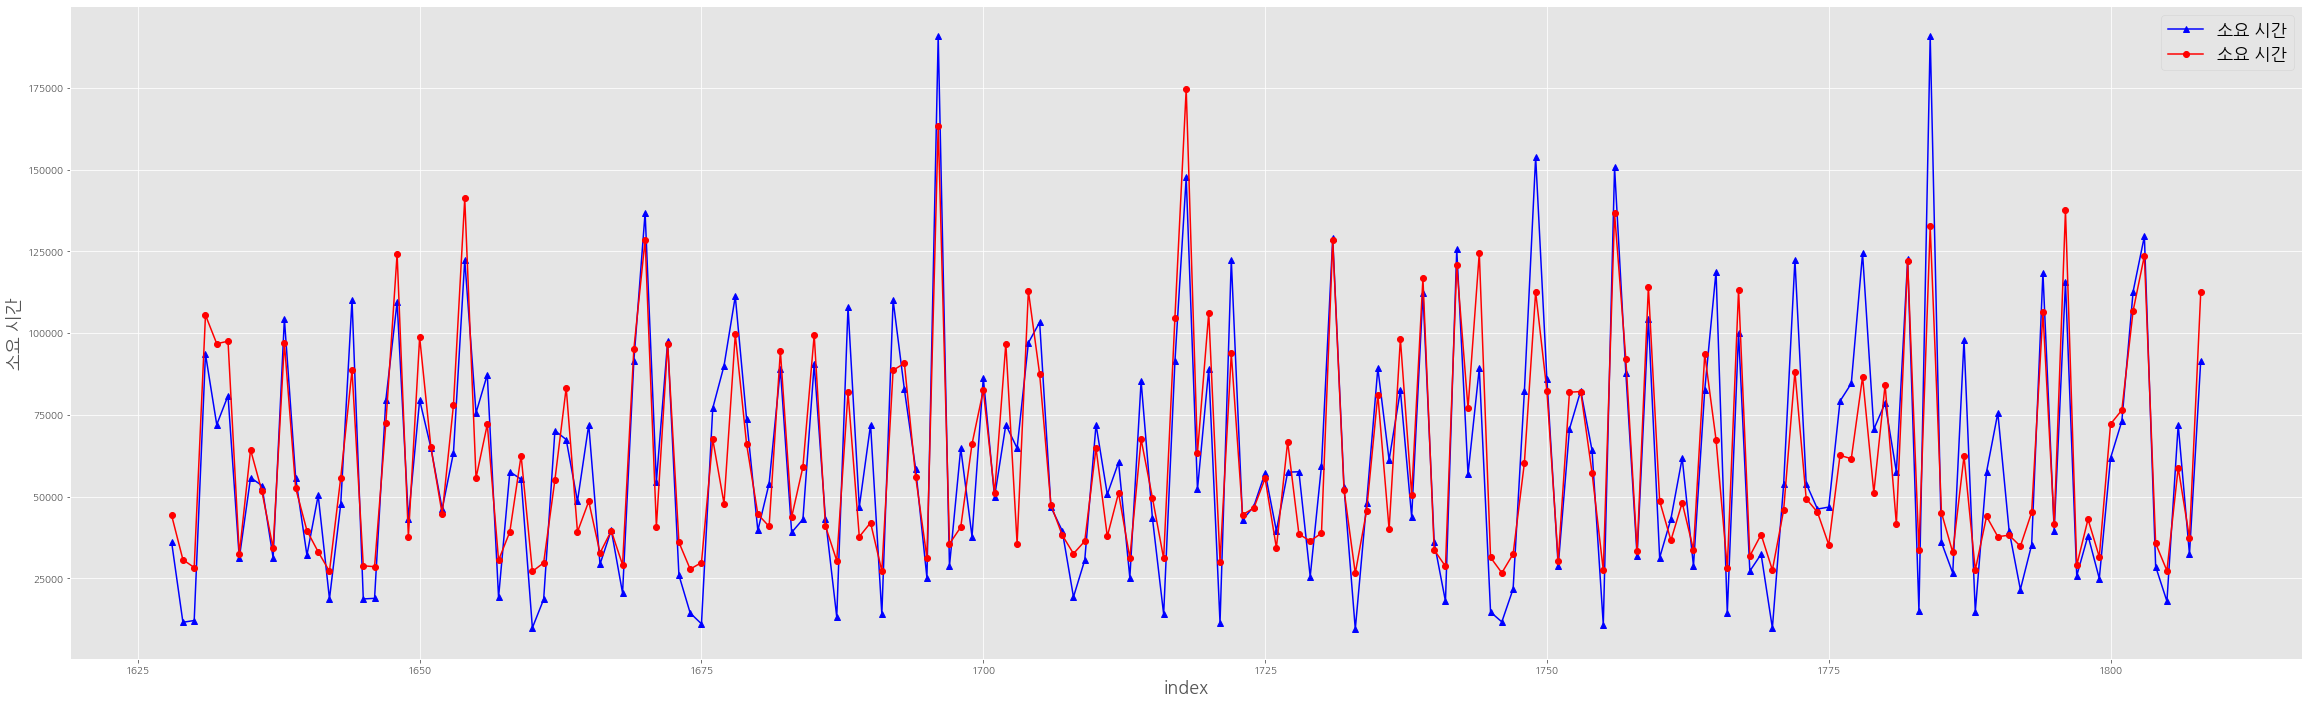

In [686]:
predictions = model_ridge_alpha_10.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [695]:
# Lasso_regression
model_lasso001 = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_lasso001.score(X_test, y_test)))

훈련 세트 점수: 0.832981
테스트 세트 점수: 0.813211


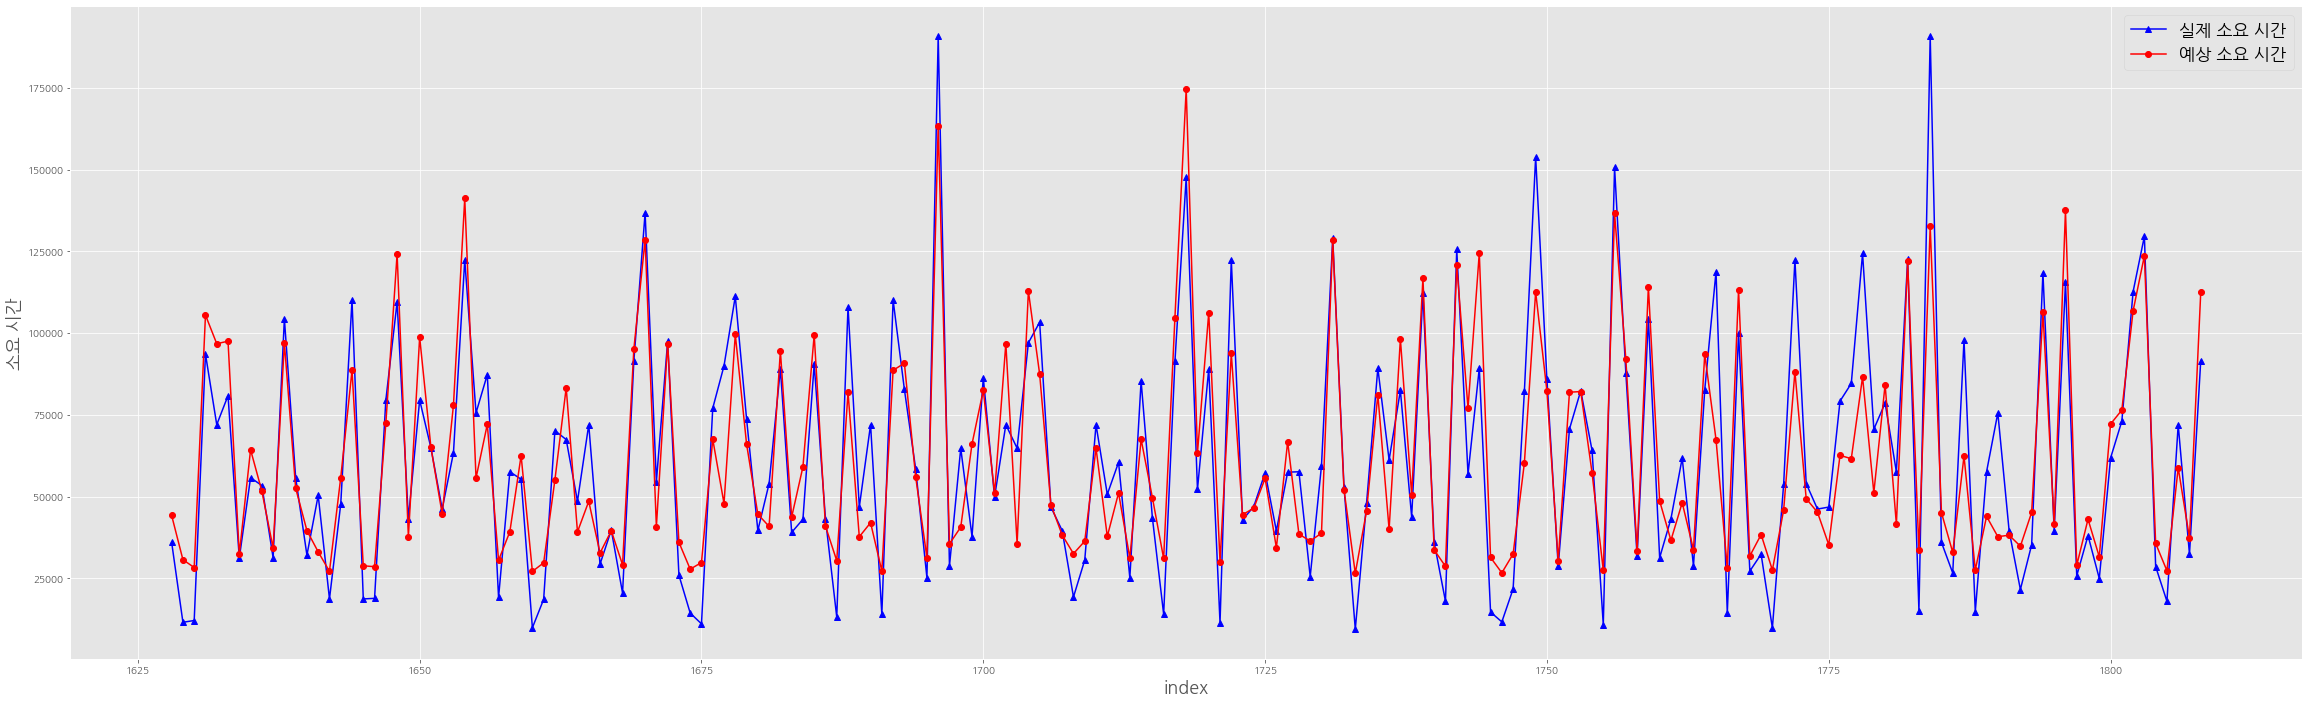

In [696]:
predictions = model_lasso001.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [706]:
# Gradient_Boosting
from sklearn.ensemble import GradientBoostingRegressor

model_gradient = GradientBoostingRegressor(n_estimators=1000)
model_gradient.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_gradient.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_gradient.score(X_test, y_test)))

훈련 세트 점수: 0.969871
테스트 세트 점수: 0.801278


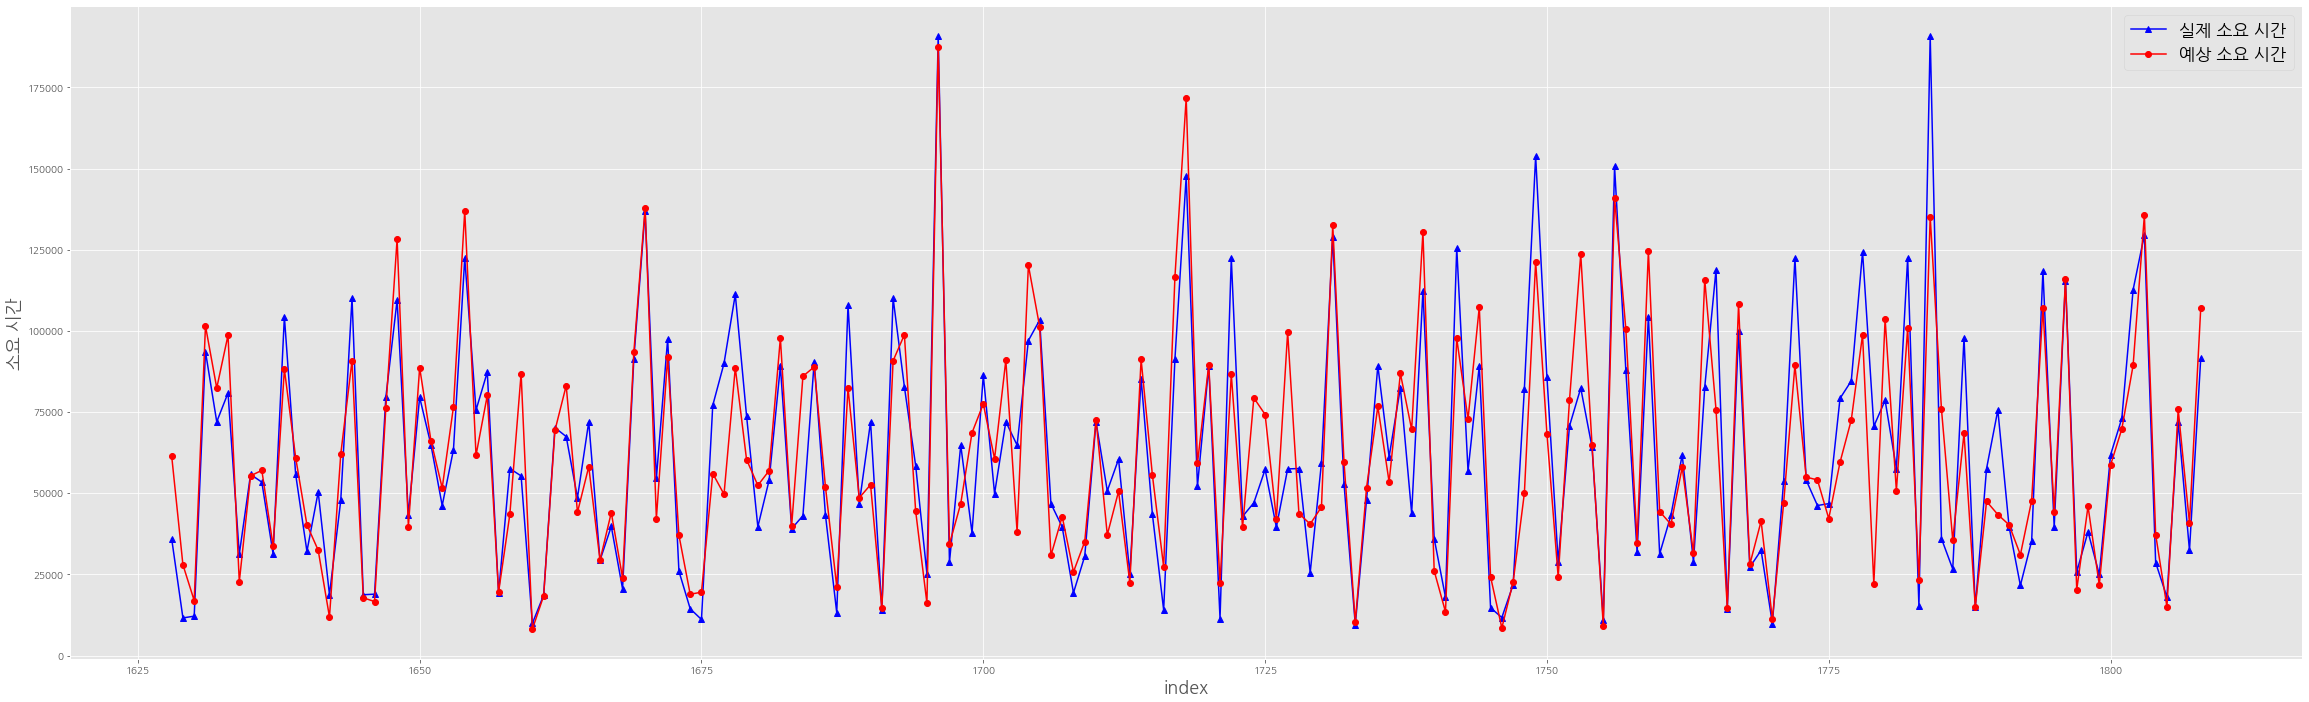

In [707]:
predictions = model_gradient.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [720]:
# SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
SupportVectorRegModel = make_pipeline(StandardScaler(), SVR(C=1000000.0, epsilon=0.3))
SupportVectorRegModel.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(SupportVectorRegModel.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(SupportVectorRegModel.score(X_test, y_test)))


훈련 세트 점수: 0.861694
테스트 세트 점수: 0.843213


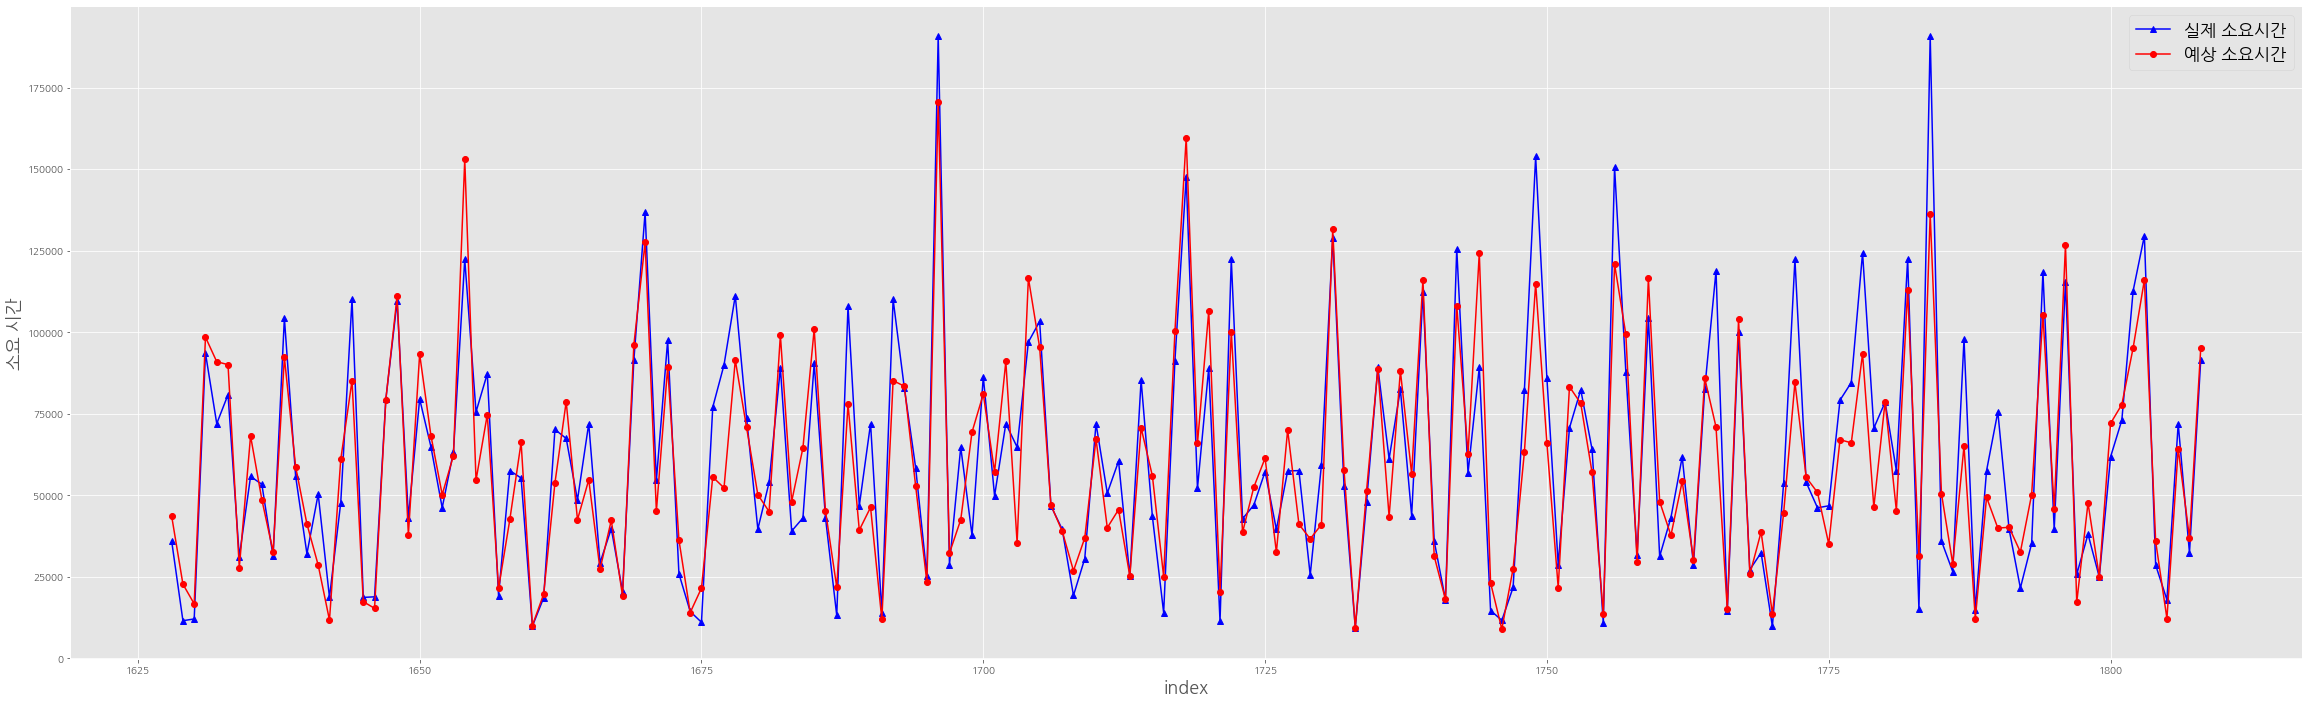

In [721]:
predictions = SupportVectorRegModel.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요시간')
plt.legend(fontsize='xx-large')
plt.show()

In [723]:
# Random_Forest
from sklearn.ensemble import RandomForestRegressor

model_randomForest = RandomForestRegressor(n_estimators=1000)
model_randomForest.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_randomForest.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_randomForest.score(X_test, y_test)))

훈련 세트 점수: 0.978108
테스트 세트 점수: 0.840674


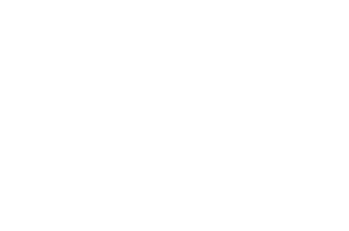

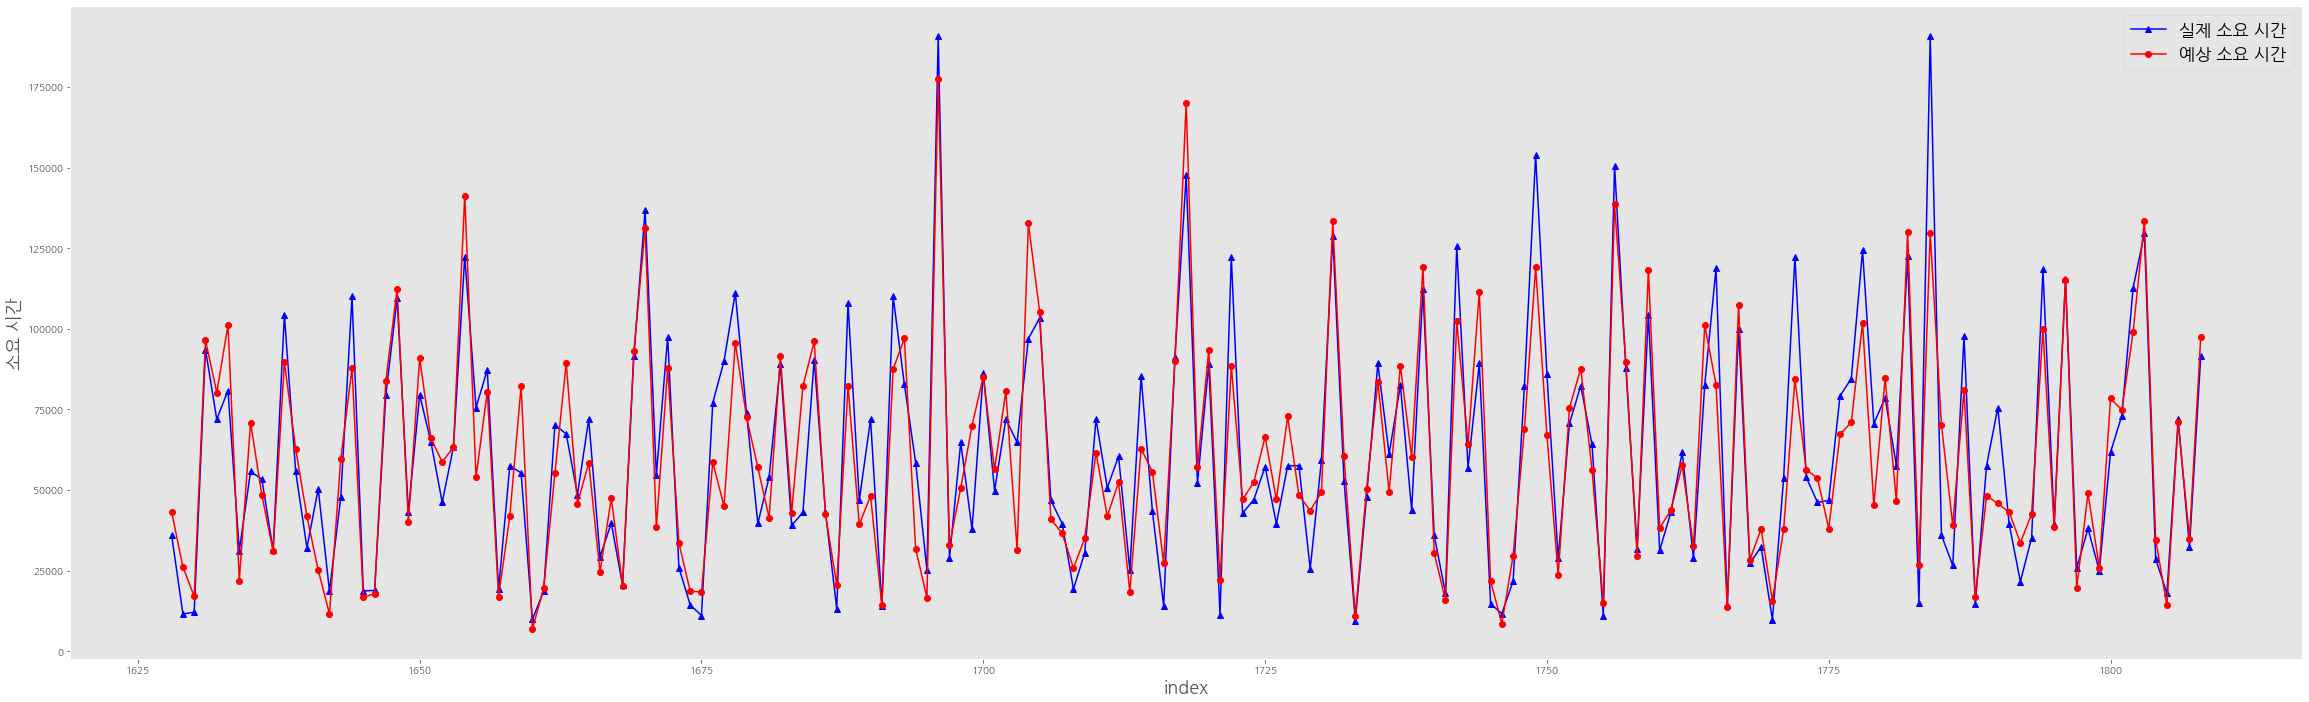

In [724]:
predictions = model_randomForest.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)
plt.axis("off")
plt.figure(figsize=(40,12))
plt.grid(False)
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()